## Data Analysis Document

In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open('academy_monthly_mobile_201501-202310.json', 'r') as f1, open('academy_monthly_desktop_201501-202310.json', 'r') as f2,open('academy_monthly_cumulative_201501-202310.json', 'r') as f3:
    data_mobile = json.load(f1)
    data_desktop = json.load(f2)
    data_cums = json.load(f3)

### 1. Max Average and Min Average

The following code computes the maximum and minimum average views and Wikipedia page title from desktop access.

In [15]:
avg_views = {}
for article, views in data_desktop.items():
    total_views = sum(entry['views'] for entry in views)
    avg_views[article] = total_views / len(views)
    
max_avg_view_article = max(avg_views, key=avg_views.get)
min_avg_view_article = min(avg_views, key=avg_views.get)
articles_desktop = [max_avg_view_article, min_avg_view_article]
views_desktop = [avg_views[max_avg_view_article], avg_views[min_avg_view_article]]

print(f"Maximum Average Views: {avg_views[max_avg_view_article]} by {max_avg_view_article}")
print(f"Minimum Average Views: {avg_views[min_avg_view_article]} by {min_avg_view_article}")

Maximum Average Views: 216853.25396825396 by Joker (2019 film)
Minimum Average Views: 36.61616161616162 by Project Hope (film)


The following code computes the maximum and minimum average views and Wikipedia page title from mobile access.

In [16]:
avg_views = {}
for article, views in data_mobile.items():
    total_views = sum(entry['views'] for entry in views)
    avg_views[article] = total_views / len(views)

max_avg_view_article = max(avg_views, key=avg_views.get)
min_avg_view_article = min(avg_views, key=avg_views.get)
articles_mobile = [max_avg_view_article, min_avg_view_article]
views_mobile = [avg_views[max_avg_view_article], avg_views[min_avg_view_article]]

print(f"Maximum Average Views: {views_mobile[0]} by {articles_mobile[0]}")
print(f"Minimum Average Views: {views_mobile[1]} by {articles_mobile[1]}")

Maximum Average Views: 525412.8666666667 by The Whale (2022 film)
Minimum Average Views: 9.11111111111111 by Project Hope (film)


To plot the graph, I prepared the following lists to be placed in the plotting code:

In [45]:
# get max and min values from desktop
max_view_desktop_timestamp, min_view_desktop_timestamp = [], []
max_view_desktop_count, min_view_desktop_count = [], []

for month in data_desktop[articles_desktop[0]]:
    max_view_desktop_timestamp.append(month['timestamp'][:-2])
    max_view_desktop_count.append(month['views'])

for month in data_desktop[articles_desktop[1]]:
    min_view_desktop_timestamp.append(month['timestamp'][:-2])
    min_view_desktop_count.append(month['views'])

In [47]:
# get max and min values from mobile
max_view_mobile_timestamp, min_view_mobile_timestamp = [], []
max_view_mobile_count, min_view_mobile_count = [], []

for month in data_mobile[articles_mobile[0]]:
    max_view_mobile_timestamp.append(month['timestamp'][:-2])
    max_view_mobile_count.append(month['views'])

for month in data_mobile[articles_mobile[1]]:
    min_view_mobile_timestamp.append(month['timestamp'][:-2])
    min_view_mobile_count.append(month['views'])

The following code generates the plot:

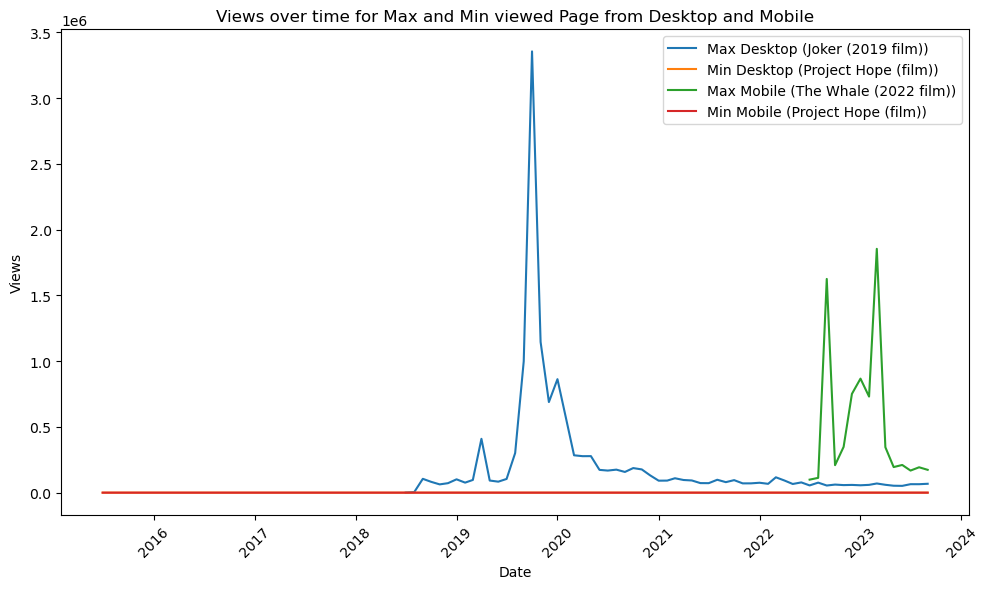

In [79]:
plt.figure(figsize=(10, 6))

plt.plot(pd.to_datetime(max_view_desktop_timestamp), max_view_desktop_count, label=f'Max Desktop ({articles_desktop[0]})')
plt.plot(pd.to_datetime(min_view_desktop_timestamp), min_view_desktop_count, label=f'Min Desktop ({articles_desktop[1]})')
plt.plot(pd.to_datetime(max_view_mobile_timestamp), max_view_mobile_count, label=f'Max Mobile ({articles_mobile[0]})')
plt.plot(pd.to_datetime(min_view_mobile_timestamp), min_view_mobile_count, label=f'Min Mobile ({articles_mobile[1]})')

plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Views over time for Max and Min viewed Page from Desktop and Mobile')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Top 10 Peak Page Views

The following code generates the top 10 peak page views from desktop:

In [60]:
top10_desktop = []
for article, views in data_desktop.items():
    max_view = 0
    for view in views:
        max_view = max(max_view, view['views'])
    top10_desktop.append([article, max_view])
top10_desktop.sort(key = lambda x: x[1], reverse=True)
top10_desktop = top10_desktop[:10]
top10_desktop

[['Joker (2019 film)', 3355060],
 ['Parasite (2019 film)', 2813357],
 ['Black Panther (film)', 2659906],
 ['The Revenant (2015 film)', 2165430],
 ['Avatar: The Way of Water', 1890048],
 ['Spectre (2015 film)', 1812832],
 ['Dune (2021 film)', 1694498],
 ['1917 (2019 film)', 1567798],
 ['Tenet (film)', 1565634],
 ['Blade Runner 2049', 1517482]]

In [63]:
top10_desktop_plot = {}
for article, _ in top10_desktop:
    timestamp, count = [], []
    for month in data_desktop[article]:
        timestamp.append(month['timestamp'][:-2])
        count.append(month['views'])
    top10_desktop_plot[article] = [timestamp, count]

The following code generates the top 10 peak page views from mobile:

In [72]:
top10_mobile = []
for article, views in data_mobile.items():
    max_view = 0
    for view in views:
        max_view = max(max_view, view['views'])
    top10_mobile.append([article, max_view])
top10_mobile.sort(key = lambda x: x[1], reverse=True)
top10_mobile = top10_mobile[:10]
top10_mobile

[['Avatar: The Way of Water', 8106378],
 ['Joker (2019 film)', 8047344],
 ['Black Panther (film)', 5503665],
 ['Parasite (2019 film)', 5484956],
 ['Black Panther: Wakanda Forever', 4634986],
 ['RRR (film)', 4114488],
 ['Dune (2021 film)', 3956760],
 ['The Revenant (2015 film)', 3802421],
 ['Top Gun: Maverick', 3784632],
 ['Everything Everywhere All at Once', 3597067]]

In [68]:
top10_mobile_plot = {}
for article, _ in top10_mobile:
    timestamp, count = [], []
    for month in data_mobile[article]:
        timestamp.append(month['timestamp'][:-2])
        count.append(month['views'])
    top10_mobile_plot[article] = [timestamp, count]

The following code generates the plot for the top 10 peak pages from desktop and mobile:

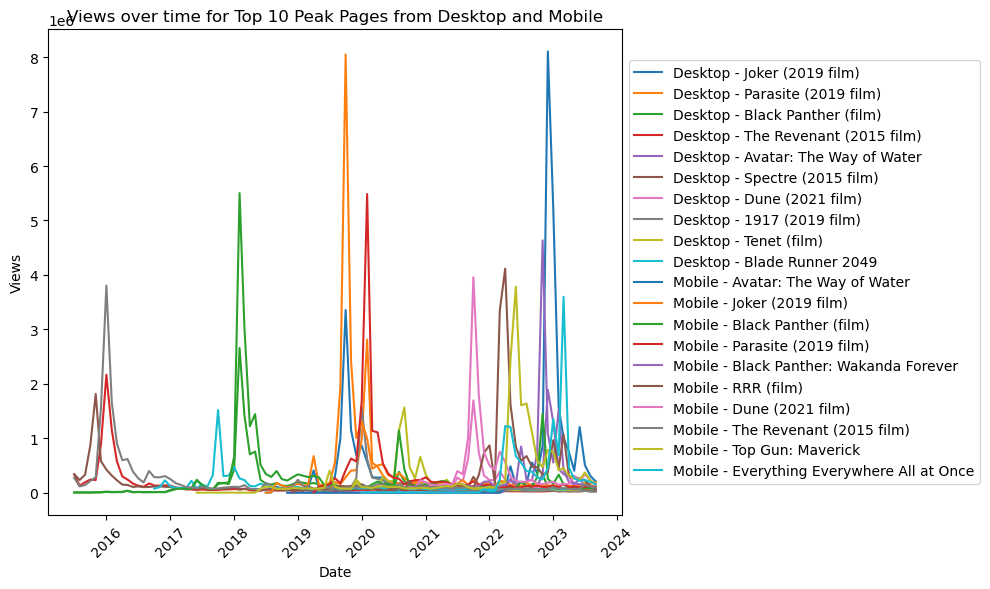

In [80]:
plt.figure(figsize=(10, 6))

for article, (ts, ct) in top10_desktop_plot.items():
    plt.plot(pd.to_datetime(ts), ct, label=f'Desktop - {article}')
for article, (ts, ct) in top10_mobile_plot.items():
    plt.plot(pd.to_datetime(ts), ct, label=f'Mobile - {article}')
    

plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Views over time for Top 10 Peak Pages from Desktop and Mobile')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Fewest Months of Data

The following code computes 10 page with the fewest months of data from desktop:

In [73]:
few10_desktop = []
for article, views in data_desktop.items():
    month_count = len(views)
    few10_desktop.append([article, month_count])
    
few10_desktop.sort(key = lambda x: x[1])
few10_desktop = few10_desktop[:10]
few10_desktop

[['The Elephant Whisperers', 10],
 ['The Boy, the Mole, the Fox and the Horse (film)', 10],
 ['Women Talking (film)', 11],
 ['Eskimo (1933 film)', 12],
 ['The Whale (2022 film)', 15],
 ['The Critic (1963 film)', 15],
 ['The Windshield Wiper', 20],
 ['The Queen of Basketball', 20],
 ["Guillermo del Toro's Pinocchio", 21],
 ['Navalny (film)', 21]]

In [76]:
few10_desktop_plot = {}
for article, _ in few10_desktop:
    timestamp, count = [], []
    for month in data_desktop[article]:
        timestamp.append(month['timestamp'][:-2])
        count.append(month['views'])
    few10_desktop_plot[article] = [timestamp, count]

The following code computes 10 page with the fewest months of data from mobile:

In [75]:
few10_mobile = []
for article, views in data_mobile.items():
    month_count = len(views)
    few10_mobile.append([article, month_count])
    
few10_mobile.sort(key = lambda x: x[1])
few10_mobile = few10_mobile[:10]
few10_mobile

[['The Elephant Whisperers', 10],
 ['The Boy, the Mole, the Fox and the Horse (film)', 10],
 ['Women Talking (film)', 11],
 ['Eskimo (1933 film)', 12],
 ['The Whale (2022 film)', 15],
 ['The Critic (1963 film)', 15],
 ['The Windshield Wiper', 20],
 ['The Queen of Basketball', 20],
 ["Guillermo del Toro's Pinocchio", 21],
 ['Navalny (film)', 21]]

In [77]:
few10_mobile_plot = {}
for article, _ in few10_mobile:
    timestamp, count = [], []
    for month in data_mobile[article]:
        timestamp.append(month['timestamp'][:-2])
        count.append(month['views'])
    few10_mobile_plot[article] = [timestamp, count]

The code below generates the plot for 10 pages with fewest months of data from desktop and mobile:

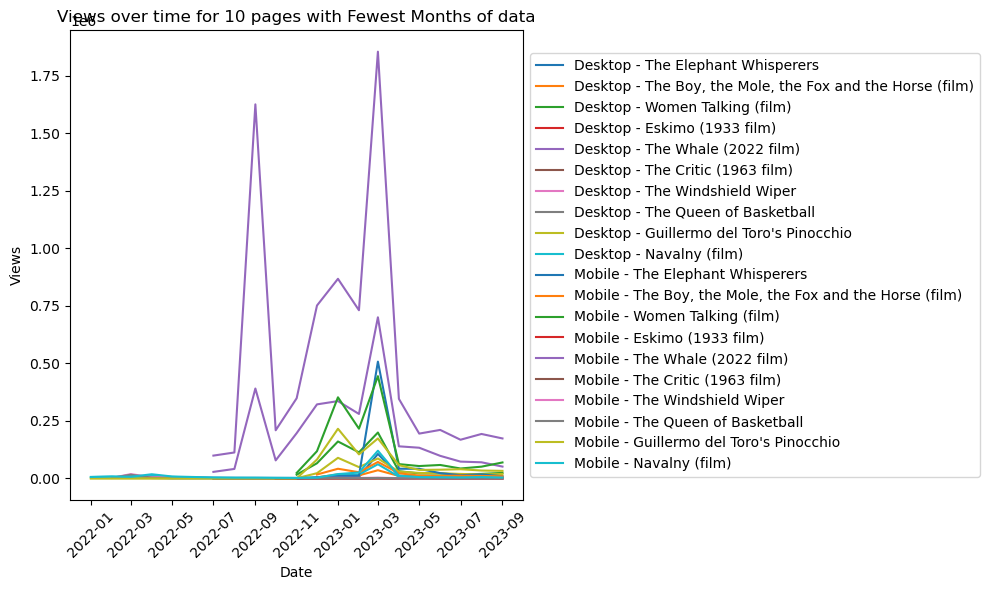

In [81]:
plt.figure(figsize=(10, 6))

for article, (ts, ct) in few10_desktop_plot.items():
    plt.plot(pd.to_datetime(ts), ct, label=f'Desktop - {article}')
for article, (ts, ct) in few10_mobile_plot.items():
    plt.plot(pd.to_datetime(ts), ct, label=f'Mobile - {article}')
    

plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Views over time for 10 pages with Fewest Months of data')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()